In [1]:
using Plots
num_x = 7
num_y = 7

a = 4

4

In [2]:
function periodic_graphene(num_x, num_y; a=1, if_draw=false, if_periodic=false)
    v1 = [3/2, √3/2] * a
    v2 = [3/2, -√3/2] * a

    coords = []
    for x in 0 : num_x-1
        for y in 0 : num_y-1
            push!(coords, x * v1 + y * v2 + [-a/2, 0])
            push!(coords, x * v1 + y * v2 + [a/2, 0])
        end
    end
    
    adjancency = [[1, 2] .+ y .+ 2*num_y * x for y in 0:2*(num_y-1) for x in 0 : num_x-1]
    adjancency = vcat(
        adjancency,
        [[2y, 2y+2num_y-1] .+ 2*num_y*x for y in 1:num_y for x in 0 : num_x-2]
    )
    
    periodic_adjancency = []
    if if_periodic
        periodic_adjancency = [[1, 2*((num_x-1)*num_y+1)] .+ 2y for y in 0:num_y-1]
        periodic_adjancency = vcat(
            periodic_adjancency,
            [[1, 2*num_y] .+ 2*num_y * x for x in 0 : num_x-1]
        )        
    end

    if if_draw
        plot([c[1] for c in coords], [c[2] for c in coords], seriestype=:scatter, aspect_ratio = :equal)
 
        for (ind1, ind2) in adjancency
            plot!([coords[ind1][1], coords[ind2][1]], [coords[ind1][2], coords[ind2][2]], color=:red, linewidth=3)
        end
        for (ind1, ind2) in periodic_adjancency
            plot!([coords[ind1][1], coords[ind2][1]], [coords[ind1][2], coords[ind2][2]], color=:blue, linewidth=3)
        end        
        for (ind, (x, y)) in enumerate(coords)
            annotate!(x, y, text("$ind", :top, 10))
        end        
        plot!(title="$(num_x)x$(num_y) graphe", legend=:false)            
        display(current())
    end
        
    adjancency = vcat(adjancency, periodic_adjancency)            
        
    return coords, adjancency
    
end

periodic_graphene (generic function with 1 method)

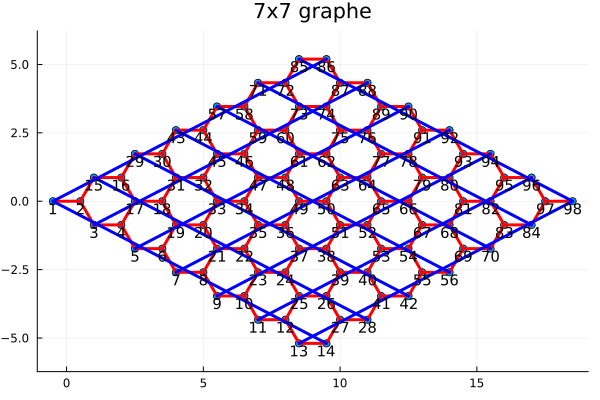

(Any[[-0.5, 0.0], [0.5, 0.0], [1.0, -0.8660254037844386], [2.0, -0.8660254037844386], [2.5, -1.7320508075688772], [3.5, -1.7320508075688772], [4.0, -2.598076211353316], [5.0, -2.598076211353316], [5.5, -3.4641016151377544], [6.5, -3.4641016151377544]  …  [11.5, 3.464101615137755], [12.5, 3.464101615137755], [13.0, 2.598076211353316], [14.0, 2.598076211353316], [14.5, 1.7320508075688776], [15.5, 1.7320508075688776], [16.0, 0.8660254037844393], [17.0, 0.8660254037844393], [17.5, 0.0], [18.5, 0.0]], [[1, 2], [15, 16], [29, 30], [43, 44], [57, 58], [71, 72], [85, 86], [2, 3], [16, 17], [30, 31]  …  [9, 94], [11, 96], [13, 98], [1, 14], [15, 28], [29, 42], [43, 56], [57, 70], [71, 84], [85, 98]])

In [3]:
periodic_graphene(num_x, num_y, if_draw=true, if_periodic=true) 

In [124]:
function periodic_graphene_2(num_x, num_y; a=1, if_draw=false, if_periodic=false)
    if mod(num_x, 2) != 0
        error("num_x should be an even number")
    end
    

    pair_1 = [[0, 0], [-1/2, √3/2]*a]
    chain_1 = []
    for y in 0 : num_y-1
        chain_1 = vcat(chain_1, pair_1 .+ [[0, √3 * a] .* y])
    end
    pair_2 = [[a, 0], [3/2, √3/2]*a]
    chain_2 = []
    for y in 0 : num_y-1
        chain_2 = vcat(chain_2, pair_2 .+ [[0, √3 * a] .* y])
    end    
    
    coords = []
    for x in 1 : num_x
        mod(x, 2) == 1 && (
            coords = vcat(coords, chain_1 .+ [[3a, 0] .* floor((x-1)/2)])
        )
        mod(x, 2) == 0 && (
            coords = vcat(coords, chain_2 .+ [[3a, 0] .* floor((x-1)/2)])
        )        
    end

    adjancency = [[1, 2] .+ y .+ 2*num_y * x for y in 0:2*(num_y-1) for x in 0 : num_x-1]
    adjancency = vcat(
        adjancency,
        [[2y-1, 2y+2num_y-1] .+ 2*num_y*x for y in 1:num_y for x in 0 : 2 : num_x-2],
        [[2y, 2y+2num_y] .+ 2*num_y*x for y in 1:num_y for x in 1 : 2 : num_x-2]
    )

    periodic_adjancency = []
    if if_periodic
        periodic_adjancency = [[2, 2*(num_x-1)*num_y+2] .+ 2y for y in 0:num_y-1]
        periodic_adjancency = vcat(
            periodic_adjancency,
            [[1, 2*num_y] .+ 2*num_y * x for x in 0 : num_x-1]
        )        
    end
    
    if if_draw
        plot([c[1] for c in coords], [c[2] for c in coords], seriestype=:scatter, aspect_ratio = :equal)
 
        for (ind1, ind2) in adjancency
            plot!([coords[ind1][1], coords[ind2][1]], [coords[ind1][2], coords[ind2][2]], color=:red, linewidth=3)
        end
        for (ind1, ind2) in periodic_adjancency
            plot!([coords[ind1][1], coords[ind2][1]], [coords[ind1][2], coords[ind2][2]], color=:blue, linewidth=1)
        end        
        for (ind, (x, y)) in enumerate(coords)
            annotate!(x, y, text("$ind", :top, 10))
        end        
        plot!(title="$(num_x)x$(num_y) graphene", legend=:false)            
        display(current())
    end    

    adjancency = vcat(adjancency, periodic_adjancency)            
    
    return coords, adjancency
    
end

periodic_graphene_2 (generic function with 1 method)

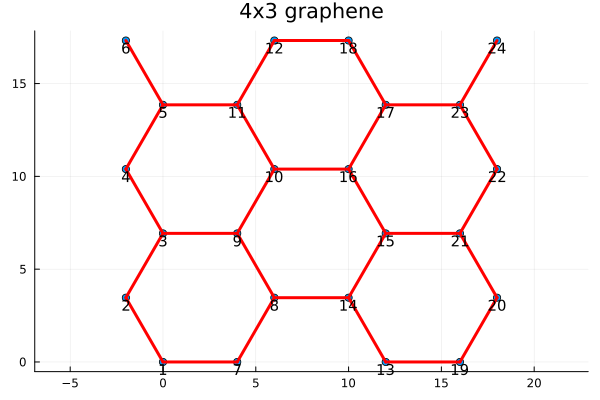

In [130]:
# coords, adjancency = periodic_graphene_2(12, 10, a = 4, if_draw=true, if_periodic=false) ;  
coords, adjancency = periodic_graphene_2(4, 3, a = 4, if_draw=true, if_periodic=false) ;  

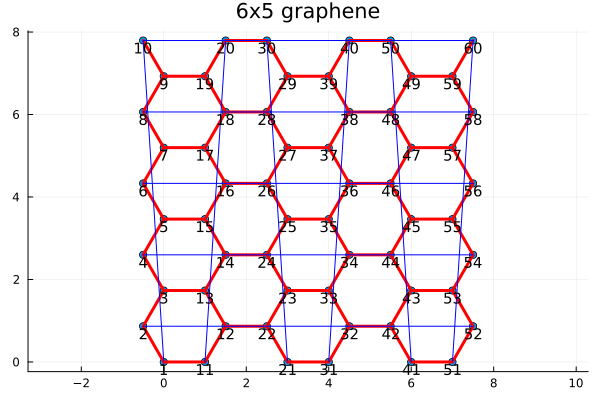

(Any[[0.0, 0.0], [-0.5, 0.8660254037844386], [0.0, 1.7320508075688772], [-0.5, 2.598076211353316], [0.0, 3.4641016151377544], [-0.5, 4.330127018922193], [0.0, 5.196152422706632], [-0.5, 6.06217782649107], [0.0, 6.928203230275509], [-0.5, 7.794228634059947]  …  [7.0, 0.0], [7.5, 0.8660254037844386], [7.0, 1.7320508075688772], [7.5, 2.598076211353316], [7.0, 3.4641016151377544], [7.5, 4.330127018922193], [7.0, 5.196152422706632], [7.5, 6.06217782649107], [7.0, 6.928203230275509], [7.5, 7.794228634059947]], [[1, 2], [11, 12], [21, 22], [31, 32], [41, 42], [51, 52], [2, 3], [12, 13], [22, 23], [32, 33]  …  [4, 54], [6, 56], [8, 58], [10, 60], [1, 10], [11, 20], [21, 30], [31, 40], [41, 50], [51, 60]])

In [133]:
num_x, num_y = 6, 5
coords, _ = periodic_graphene_2(num_x, num_y, if_draw=true, if_periodic=true)

In [127]:
[coords[2], coords[end]]

2-element Vector{Vector{Float64}}:
 [-2.0, 3.4641016151377544]
 [66.0, 65.81793068761733]

In [132]:
20/(1/2+2)

8.0